In [1]:
import pandas as pd

In [3]:
for i in range(24):
    if i==0:
        train = pd.read_pickle('../RIT_julio/SHAP/nuevo11/Scitail/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('../RIT_julio/SHAP/nuevo11/Scitail/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [4]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.666667,0.0,0.000000,2.417207,0.000000,0.600000,0.680414,0.000000,0.000000,...,0.000000,7,0,8,0.620370,0.000000,0,0,0.333333,neutral
1,2,0.666667,0.0,0.000000,2.278147,0.000000,0.800000,0.035718,0.000000,0.000000,...,0.000000,7,0,7,0.000000,0.000000,0,0,0.333333,entails
2,2,0.333333,0.0,1.348855,2.193023,1.263809,0.200000,0.596285,3.778309,0.004289,...,1.459148,6,2,7,0.437037,0.585400,0,0,0.666667,neutral
3,2,0.250000,0.0,1.353538,2.436234,0.721928,0.333333,0.734847,3.911269,0.004860,...,0.650022,6,1,10,0.653846,0.855946,0,0,0.750000,entails
4,2,0.500000,0.0,0.000000,2.617100,0.000000,0.800000,0.645497,0.000000,0.000000,...,0.000000,7,0,9,0.811111,0.000000,0,0,0.500000,entails
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2,0.857143,0.0,0.000000,2.245975,0.000000,0.000000,0.210819,0.000000,0.000000,...,0.000000,7,0,8,0.338384,0.000000,1,0,0.142857,neutral
93,2,0.400000,0.0,0.999999,1.737736,0.991264,0.200000,0.332820,3.823160,0.003940,...,0.721928,5,1,13,0.434913,0.197268,0,0,0.600000,neutral
94,2,0.400000,0.0,1.263206,2.324838,1.483832,0.600000,0.496139,3.796239,0.003821,...,0.721928,5,1,14,0.489352,0.374039,0,0,0.600000,entails
95,2,0.600000,0.0,1.204488,2.068869,1.491115,0.600000,0.644503,3.796239,0.004081,...,0.721928,5,1,11,0.546724,0.920413,0,0,0.400000,entails


In [6]:
for i in range(24):
    if i==0:
        temp1 = pd.read_csv('../OPENAI/data/Scitail/TRAIN_'+str(i+1)+'.csv')
    else:
        try:
            temp = pd.read_csv('../OPENAI/data/Scitail/TRAIN_'+str(i+1)+'.csv')
            temp1=pd.concat([temp1,temp])
        except:
            print(i+1)

In [7]:
temp1

,sentence1,sentence2,gold_label
0,Pluto rotates once on its axis every 6.39 Eart...,Earth rotates on its axis once times in one day.,neutral
1,---Glenn =====================================...,Earth rotates on its axis once times in one day.,entails
2,geysers - periodic gush of hot water at the su...,The surface of the sun is much hotter than alm...,neutral
3,Facts: Liquid water droplets can be changed in...,Evaporation is responsible for changing liquid...,entails
4,"By comparison, the earth rotates on its axis o...",Earth rotates on its axis once times in one day.,entails
...,...,...,...
92,"which is not only the motion of our bodies, bu...",Work is done only if a force is exerted in the...,neutral
93,"The Red Star, that celestial curse whose eccen...",Red-shift refers to a shift toward red in the ...,neutral
94,The lines in the spectrum of a luminous body s...,Red-shift refers to a shift toward red in the ...,entails
95,The radial velocity of a star away from or tow...,Red-shift refers to a shift toward red in the ...,entails


In [8]:
train=train.reset_index(drop=True)
temp1=temp1.reset_index(drop=True)

In [9]:
train["clases"]=temp1["gold_label"]
train["sentence_A"]=temp1["sentence1"]
train["sentence_B"]=temp1["sentence2"]

In [10]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [11]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,sentence_A,sentence_B
0,2,0.666667,0.0,0.000000,2.417207,2.417207,0.600000,0.680414,4.428512,0.000000,...,0.000000,8,0.620370,0.000000,0,0,0.333333,neutral,Pluto rotates once on its axis every 6.39 Eart...,Earth rotates on its axis once times in one day.
1,2,0.666667,0.0,0.000000,2.278147,2.278147,0.800000,0.035718,4.428512,0.000000,...,0.000000,7,0.000000,0.000000,0,0,0.333333,entails,---Glenn =====================================...,Earth rotates on its axis once times in one day.
2,2,0.333333,0.0,1.348855,2.193023,0.929214,0.200000,0.596285,0.404044,0.004289,...,0.333333,7,0.437037,0.585400,0,0,0.666667,neutral,geysers - periodic gush of hot water at the su...,The surface of the sun is much hotter than alm...
3,2,0.250000,0.0,1.353538,2.436234,1.714306,0.333333,0.734847,0.521042,0.004860,...,0.166667,10,0.653846,0.855946,0,0,0.750000,entails,Facts: Liquid water droplets can be changed in...,Evaporation is responsible for changing liquid...
4,2,0.500000,0.0,0.000000,2.617100,2.617100,0.800000,0.645497,4.434450,0.000000,...,0.000000,9,0.811111,0.000000,0,0,0.500000,entails,"By comparison, the earth rotates on its axis o...",Earth rotates on its axis once times in one day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23091,2,0.857143,0.0,0.000000,2.245975,2.245975,0.000000,0.210819,4.025513,0.000000,...,0.000000,8,0.338384,0.000000,1,0,0.142857,neutral,"which is not only the motion of our bodies, bu...",Work is done only if a force is exerted in the...
23092,2,0.400000,0.0,0.999999,1.737736,0.746472,0.200000,0.332820,0.540814,0.003940,...,0.200000,13,0.434913,0.197268,0,0,0.600000,neutral,"The Red Star, that celestial curse whose eccen...",Red-shift refers to a shift toward red in the ...
23093,2,0.400000,0.0,1.263206,2.324838,0.841006,0.600000,0.496139,0.734374,0.003821,...,0.200000,14,0.489352,0.374039,0,0,0.600000,entails,The lines in the spectrum of a luminous body s...,Red-shift refers to a shift toward red in the ...
23094,2,0.600000,0.0,1.204488,2.068869,0.577754,0.600000,0.644503,0.734374,0.004081,...,0.200000,11,0.546724,0.920413,0,0,0.400000,entails,The radial velocity of a star away from or tow...,Red-shift refers to a shift toward red in the ...


In [12]:
train=train[['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas','mutinf_t','max_info_t',
 'entail','list_comp','list_incomp','Jaro-Winkler_rit','negT','negH','overlap_ent','clases','sentence_A','sentence_B']]

In [13]:
train["clases"].unique()

array(['neutral', 'entails'], dtype=object)

In [14]:
entail_train=train[train["clases"]=="entails"]
#neutral_train=train[train["clases"]==1]
contradiction_train=train[train["clases"]=="neutral"]
entail_train

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,sentence_A,sentence_B
1,2,0.666667,0.000000,0.800000,0.035718,0.188924,4.428512,0.842051,1.000000,2,0,0.000000,0,0,0.333333,entails,---Glenn =====================================...,Earth rotates on its axis once times in one day.
3,2,0.250000,0.000000,0.333333,0.734847,0.196854,4.432311,0.847321,0.833333,0,0,0.653846,0,0,0.750000,entails,Facts: Liquid water droplets can be changed in...,Evaporation is responsible for changing liquid...
4,2,0.500000,0.000000,0.800000,0.645497,0.201943,4.434450,0.842051,1.000000,2,0,0.811111,0,0,0.500000,entails,"By comparison, the earth rotates on its axis o...",Earth rotates on its axis once times in one day.
8,2,0.600000,0.000000,0.500000,0.283473,0.074992,4.374568,0.864341,0.800000,0,0,0.616667,0,0,0.400000,entails,Distribution Water on earth is located primari...,Most of earth's water is located in oceans
10,2,0.250000,0.000000,1.000000,0.835672,0.143870,4.686194,1.000000,1.000000,0,0,0.650463,0,0,0.750000,entails,Younger children learn about different forms o...,"Heat, light, and sound are all different forms..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,2,0.428571,0.000000,0.333333,0.738549,0.173720,4.306748,0.700086,0.857143,2,0,0.729630,0,0,0.571429,entails,"For work to occur, a force must produce motion...",Work is done only if a force is exerted in the...
23089,-1,0.571429,0.142857,0.333333,0.721688,0.175487,4.320947,0.698179,0.857143,2,0,0.819444,0,0,0.428571,entails,Work is defined as force acting on an object i...,Work is done only if a force is exerted in the...
23093,2,0.400000,0.000000,0.600000,0.496139,0.103187,4.530613,0.840431,0.800000,0,0,0.489352,0,0,0.600000,entails,The lines in the spectrum of a luminous body s...,Red-shift refers to a shift toward red in the ...
23094,2,0.600000,0.000000,0.600000,0.644503,0.124257,4.530613,0.854930,0.800000,0,0,0.546724,0,0,0.400000,entails,The radial velocity of a star away from or tow...,Red-shift refers to a shift toward red in the ...


In [15]:
entail_train.describe()

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent
count,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8.472000e+03,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000
mean,1.800519,0.456143,0.007968,0.457971,0.595183,0.152067,4.329752e+00,0.768702,0.830872,1.145302,0.021837,0.609266,0.054415,0.046624,0.537119
std,0.625556,0.235124,0.042531,0.263699,0.158743,0.083533,2.562962e-01,0.140966,0.160116,1.133938,0.151707,0.149577,0.226847,0.210845,0.235708
min,-1.000000,0.000000,0.000000,0.000000,0.035718,-0.057443,1.029804e-12,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.333333,0.000000,0.250000,0.483494,0.091322,4.222404e+00,0.669681,0.714286,0.000000,0.000000,0.507407,0.000000,0.000000,0.375000
50%,2.000000,0.500000,0.000000,0.428571,0.594089,0.144795,4.350200e+00,0.764751,0.833333,1.000000,0.000000,0.603367,0.000000,0.000000,0.500000
75%,2.000000,0.625000,0.000000,0.666667,0.707107,0.199379,4.484367e+00,0.862469,1.000000,2.000000,0.000000,0.708333,0.000000,0.000000,0.666667
max,2.000000,1.000000,0.600000,1.000000,1.000000,0.659422,4.826077e+00,1.000000,1.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
def sample_std_mean(df_,n):
    columnas=['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas', 'mutinf_t', 'max_info_t',
              'entail', 'list_comp', 'list_incomp','Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent']
    new_sample=pd.DataFrame()
    i=0
    while i<n: 
        s=df_.sample(1)
        bandera=True
        for s_ in columnas:
            if((s[s_].values[0]<(df_.describe().at["mean",s_]-df_.describe().at["std",s_])) | (s[s_].values[0]>(df_.describe().at["mean",s_]+df_.describe().at["std",s_]))):
                bandera=False
                break
        if(bandera):
            new_sample=pd.concat([new_sample,s])
            i+=1
    return new_sample

In [17]:
entail_final=sample_std_mean(entail_train,50)
#neutral_final=sample_std_mean(neutral_train,50)
contradiction_final=sample_std_mean(contradiction_train,50)

In [18]:
entail_final.to_csv("predictions/fewshots/Scitail/entails.csv")
#neutral_final.to_csv("predictions/fewshots/MultiNLI/neutrals.csv")
contradiction_final.to_csv("predictions/fewshots/Scitail/contradictions.csv")

In [16]:
entail_train.describe()

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.0,1274.000000,1274.000000
mean,1.462323,0.193015,0.006443,0.759106,0.770346,0.265583,4.522511,0.894239,0.944725,0.578493,0.015699,0.795037,0.0,0.003140,0.806174
std,0.620855,0.220742,0.046032,0.232554,0.217916,0.095337,0.219524,0.132623,0.127274,0.722574,0.130520,0.218851,0.0,0.055967,0.221566
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.062613,2.425534,0.268622,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.666667,0.666667,0.207370,4.415975,0.836853,1.000000,0.000000,0.000000,0.679067,0.0,0.000000,0.666667
50%,2.000000,0.166667,0.000000,0.750000,0.816497,0.259598,4.567568,0.932543,1.000000,0.000000,0.000000,0.875231,0.0,0.000000,0.833333
75%,2.000000,0.333333,0.000000,1.000000,0.953463,0.321637,4.694231,1.000000,1.000000,1.000000,0.000000,0.944444,0.0,0.000000,1.000000
max,2.000000,1.000000,0.666667,1.000000,1.000000,0.668438,4.820756,1.000000,1.000000,4.000000,2.000000,1.000000,0.0,1.000000,1.000000


# graficas

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

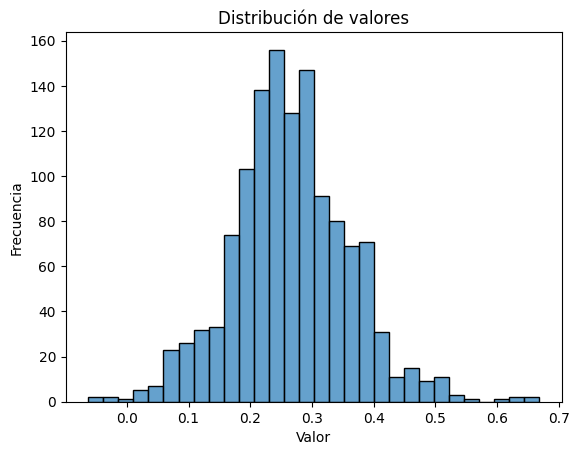

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Graficar la distribución de la columna 'values' utilizando un histograma con seaborn
sns.histplot(entail_train['sumas'],bins=30,  color="#3182bd")

# Agregar título y etiquetas
plt.title('Distribución de valores')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

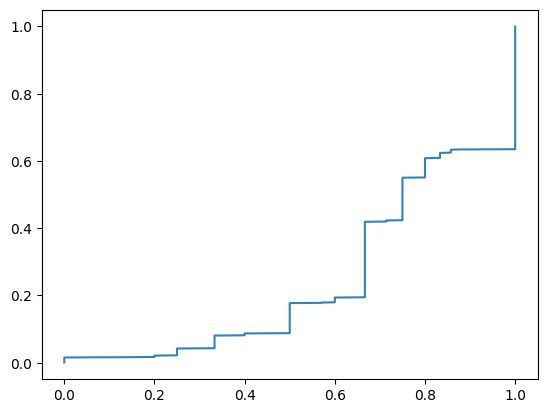

In [28]:
ecdf = ECDF(x=entail_train["jaccard"])
plt.plot(ecdf.x, ecdf.y, color="#3182bd")

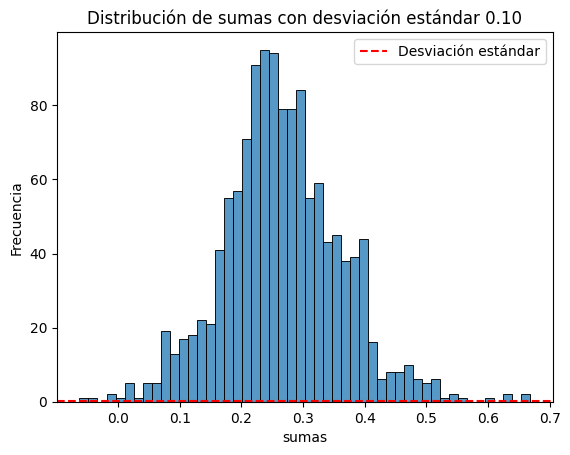

In [35]:
std_dev = entail_train["sumas"].std()
sns.histplot(entail_train["sumas"],  bins=50)
plt.axhline(y=std_dev, color='red', linestyle='--', label='Desviación estándar')
plt.title(f'Distribución de {"sumas"} con desviación estándar {std_dev:.2f}')
plt.xlabel("sumas")
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [36]:
print(std_dev)

0.09533693106481896
